In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
dataset = dataset.drop('type', axis = 1)

In [5]:
dataset.head(3)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


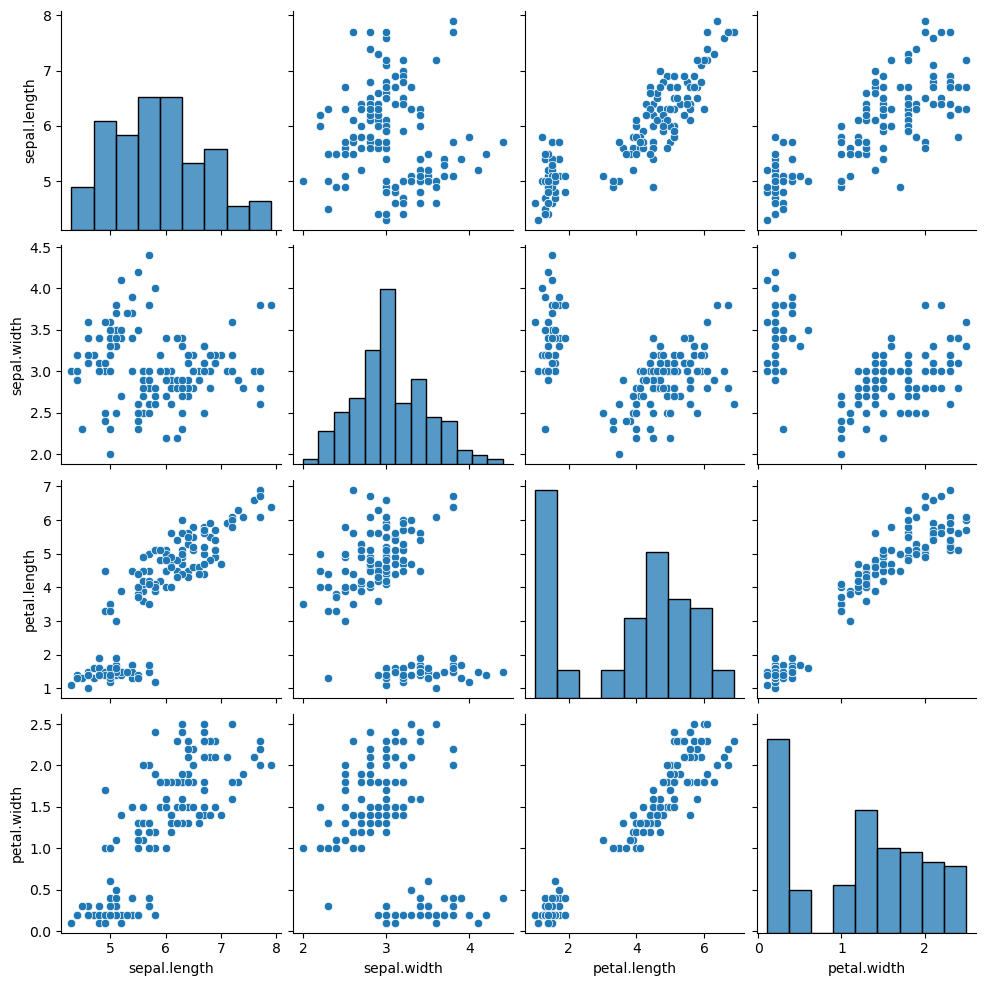

In [8]:
sns.pairplot(dataset)
plt.show()

In [9]:
from sklearn.cluster import KMeans

### WCSS(Within cluster sum of squares)

In [12]:
wcss = []

for i in range (2,21):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

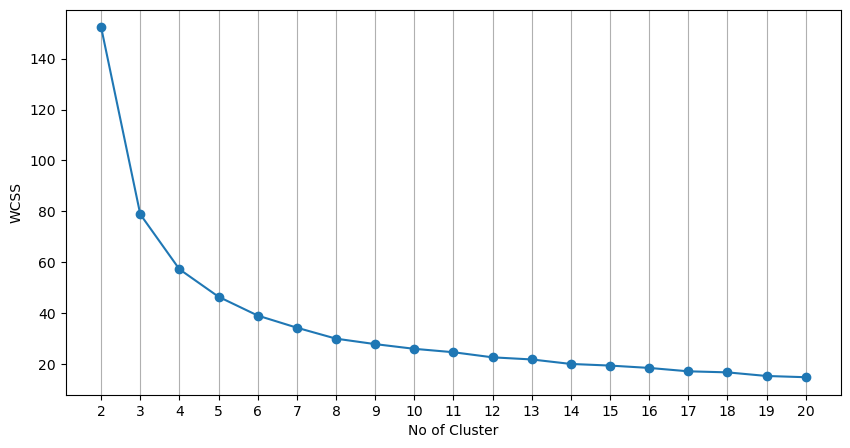

In [14]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker = 'o')
plt.xlabel('No of Cluster')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.grid(axis = 'x')
plt.show()

In [15]:
kmn = KMeans(n_clusters = 3)
dataset['Predict'] = kmn.fit_predict(dataset)

In [19]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

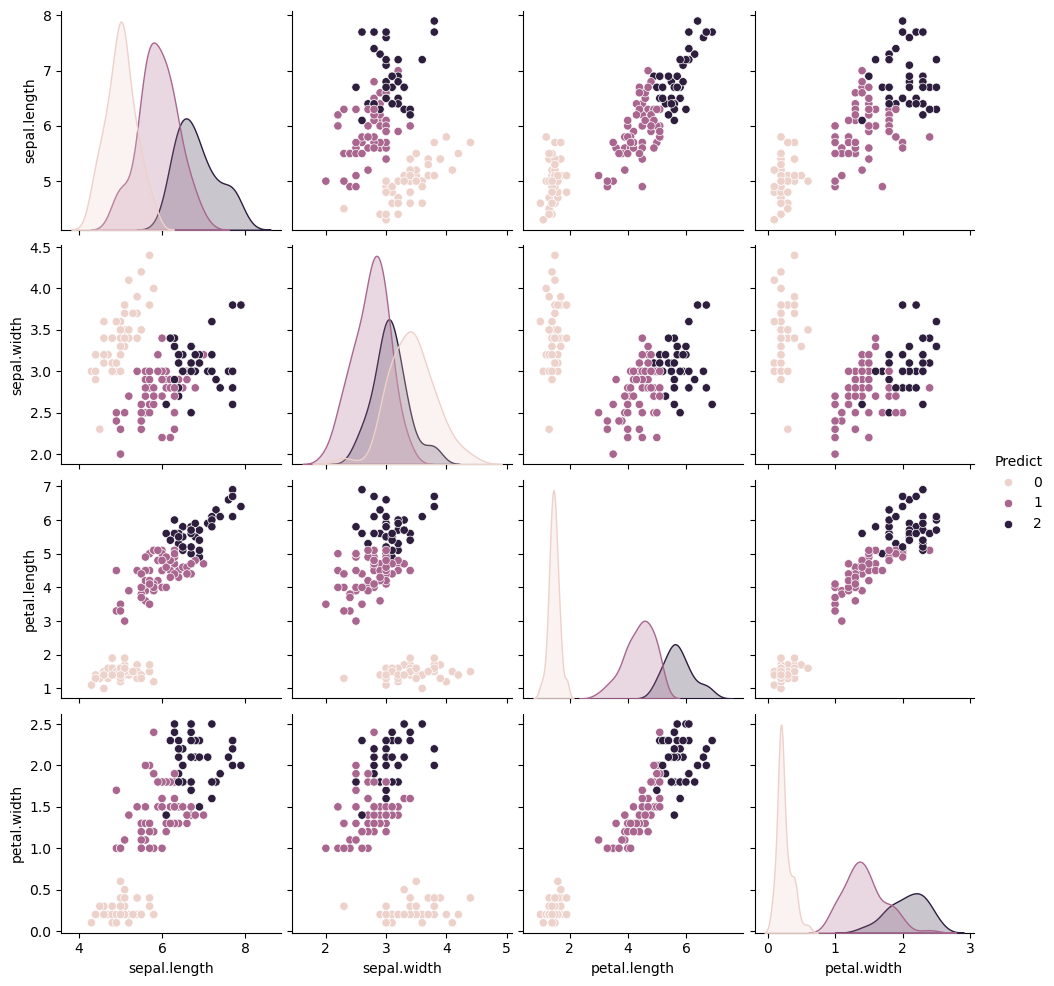

In [16]:
sns.pairplot(dataset, hue = 'Predict')

### Silhouette Score

In [17]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(dataset, labels = kmn.labels_)

0.6128676734836783

In [23]:
#comapring what no of cluster willl be the best
ss = []
no_clusters = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters = i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset, labels = km1.labels_))

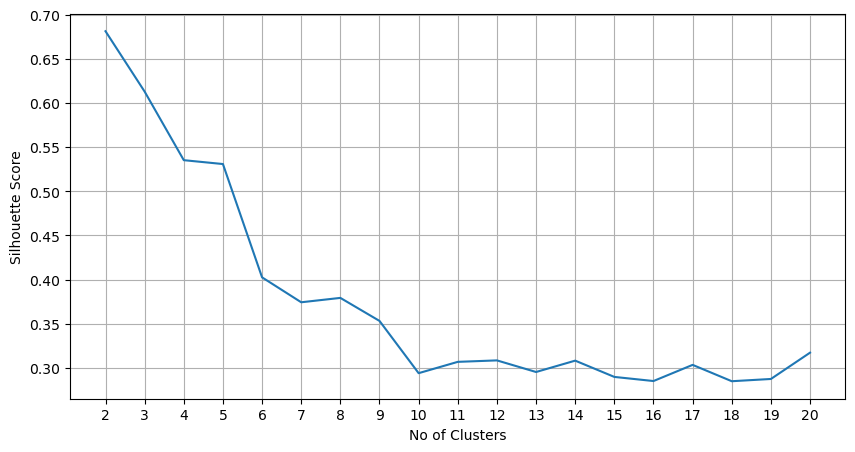

In [28]:
plt.figure(figsize=(10,5))
plt.plot(no_clusters,ss)
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(no_clusters)
plt.grid()
plt.show()

max Silhouette score is at cluster of 2